In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D


In [ ]:
#/content/drive/MyDrive/Leslye/Escuela/MCD/Deep Learning

In [ ]:
# Configuración de la carpeta de imágenes
ruta_imagenes  = '/content/drive/MyDrive/Leslye/Escuela/MCD/'  # Ruta donde están todas las imágenes

# Listas para almacenar las imágenes y las etiquetas
imagenes = []
etiquetas = []
captura = []

# Cargar imágenes y asignar etiquetas según el nombre del archivo
for nombre_archivo in os.listdir(ruta_imagenes):

    if nombre_archivo.endswith(('.png', '.jpg', '.jpeg')):
      if 'prueba' in nombre_archivo.lower():
          continue
      else:
          ruta_imagen = os.path.join(ruta_imagenes, nombre_archivo)
          cap = plt.imread(ruta_imagen)
          captura.append(cap)

          imagen = load_img(ruta_imagen, target_size=(150, 150))  # Redimensiona a 150x150
          imagen_array = img_to_array(imagen) / 255.0             # Normalización
          imagenes.append(imagen_array)

          # Asigna etiquetas basadas en el nombre del archivo
          if 'perro' in nombre_archivo.lower():
              etiquetas.append(1)  # Perro
          elif 'gato' in nombre_archivo.lower():
              etiquetas.append(0)  # Gato

# Convertir las listas en arrays de NumPy
imagenes = np.array(imagenes)
etiquetas = np.array(etiquetas)



0


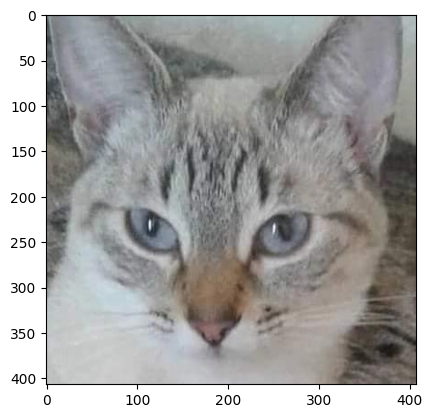

In [ ]:
i=2
print(etiquetas[i])
plt.imshow(captura[i])
plt.show()

In [ ]:
# Dividir en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)


1


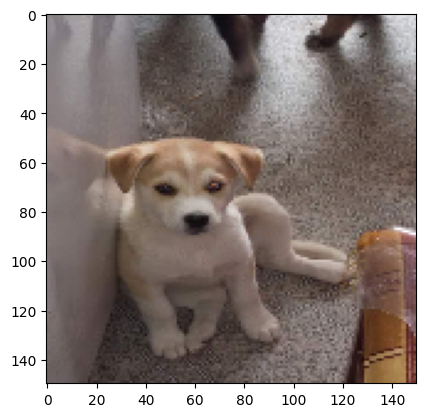

In [ ]:
i=5
print(y_train[i])
plt.imshow(X_train[i])
plt.show()

1


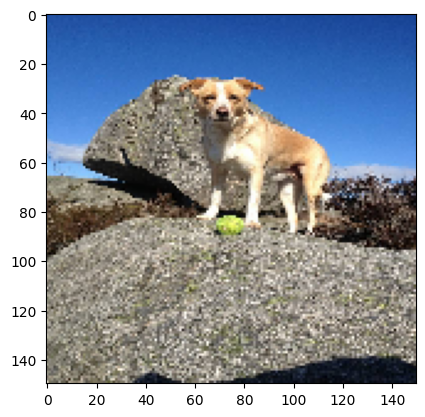

In [ ]:
i=1
print(y_val[i])
plt.imshow(X_val[i])
plt.show()

In [ ]:


# Definir la arquitectura de la CNN
#salida de la capa es la siguiente
# filtros cada uno con 3x3
#tamaño de la entrada de la imagen, con dimensiones 150x150 píxeles y 3 canales de color (RGB).
# características más importantes
# Definir la arquitectura de la CNN sin Flatten

# Crear un generador de datos de imagen con aumento (Image Augmentation)
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


modelo = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.GlobalAveragePooling2D(),  # Sustituye a Flatten

    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


# Compilar el modelo
modelo.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Entrenar el modelo
num_epochs = 40
historial = modelo.fit(
    datagen.flow(X_train, y_train, batch_size=5),
    steps_per_epoch=len(X_train) // 5,
    epochs=num_epochs,
    validation_data=(X_val, y_val)
)

# Guardar el modelo entrenado
#modelo.save('modelo_perro_gato.h5')


Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 494ms/step - accuracy: 0.5772 - loss: 0.7162 - val_accuracy: 0.5000 - val_loss: 0.6946
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4000 - loss: 0.7165 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.5267 - loss: 0.6954 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0000e+00 - loss: 0.7008 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - accuracy: 0.6565 - loss: 0.6924 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0000e+00 - loss: 0.7062 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.4008 - loss: 0.6956 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8000 - loss: 0.6898 - val_accuracy: 0.5000 - val_l

In [ ]:
from tensorflow.keras.models import load_model

# Cargar el modelo guardado
#modelo = load_model('modelo_perro_gato.h5')

# Usar el modelo para hacer predicciones
# Ejemplo de predicción con una nueva imagen
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array









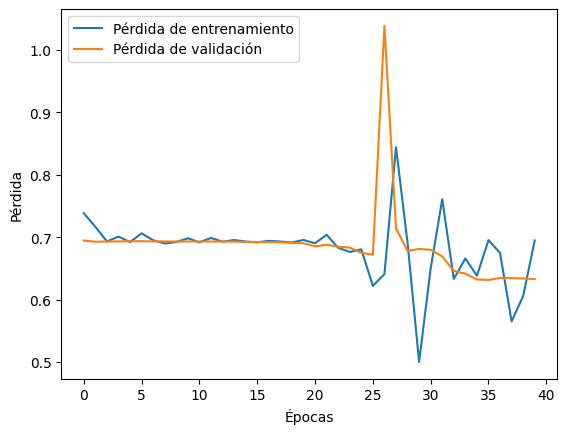

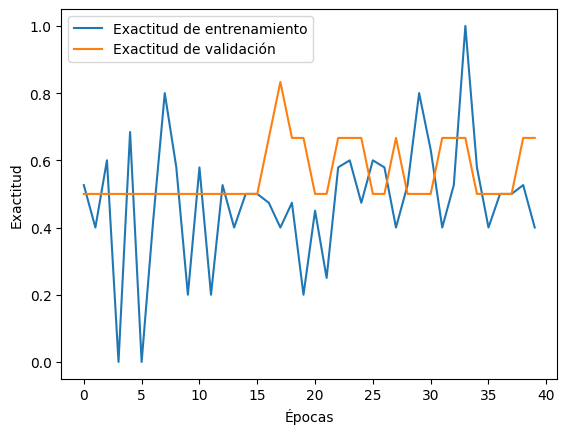

In [ ]:
# Pérdida
plt.plot(historial.history['loss'], label='Pérdida de entrenamiento')
plt.plot(historial.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Exactitud
plt.plot(historial.history['accuracy'], label='Exactitud de entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Exactitud de validación')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Es un gato


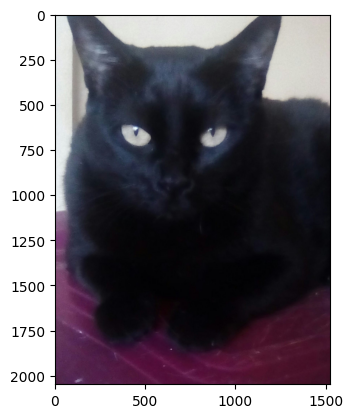

In [ ]:
i=3
# Cargar y preprocesar la imagen
nueva_imagen = imagenes[i]
imagen_array=nueva_imagen
#imagen_array = img_to_array(nueva_imagen) / 255.0
imagen_array = np.expand_dims(imagen_array, axis=0)                                    # Añadir una dimensión para el lote

# Realizar la predicción
prediccion = modelo.predict(imagen_array)
print("Es un perro" if prediccion[0][0] > 0.5 else "Es un gato")

plt.imshow(captura[i])
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Es un gato


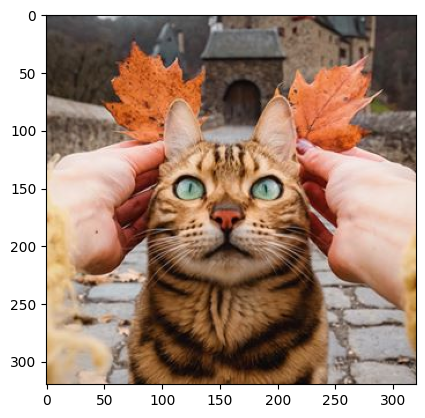

In [ ]:
# Realizar la predicción


ruta_imagen="/content/drive/MyDrive/Leslye/Escuela/prueba2.jpg"
cap = plt.imread(ruta_imagen)
plt.imshow(cap)
#plt.show()

imagen = load_img(ruta_imagen, target_size=(150, 150))  # Redimensiona a 150x150
#imagen_array = img_to_array(imagen) / 255.0             # Normalización
imagen_array = img_to_array(nueva_imagen) / 255.0
imagen_array = np.expand_dims(imagen_array, axis=0)
imagen_array


prediccion = modelo.predict(imagen_array)
print("Es un perro" if prediccion[0][0] > 0.5 else "Es un gato")

plt.imshow(cap)
plt.show()
